In [94]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from IPython.display import display, Math, Latex
%matplotlib inline

def show_latex(s):
    """
       example usage:
       
       > a,b=sy.symbols("a b")
       > expr = a+b
       > show_latex([["x =", expr], ["y =", expr**2]])

       displays in latex:

            x = a+b
            y = (a+b)^2

    """    
    
    l = "\\begin{align}\n"
    for i in s:
        l+=i[0]+" \,&\, "+sy.latex(i[1])+"\\\\ \n"
    l += "\\end{align}"
    return Latex(l)

def build_metric_tensors(basis, only_covariant=False):
    r = sy.Matrix([ [0]*len(basis)]*len(basis))
    for i, b1 in enumerate(basis):
        for j, b2 in enumerate(basis):
            r[i,j] = b1.dot(b2).simplify()
    if only_covariant:
        return r
    else:
        return r, r.inv()

def build_invariant_gradient(s, Z, Z_i, ZEij):
    grad = sy.Matrix([s.diff(i) for i in Z])
    k = sy.Matrix(Z_i).T * (ZEij*grad)
    k.simplify()
    return k   

def show_invariant_gradient(Zu, Zp, RZu, RZp):

    latex =([["\\textbf{position vectors}",""], ["\mathbf{R}(Z) =", RZu], ["\mathbf{R}(Z') =", RZp], ["", ""]])
    # the transformation equations
    fZu = RZp

    latex += [["\\textbf{transformation equations:}", ""]]
    latex += [["Z^i(Z'):", ""]]+[["&"+sy.latex(a(sy.Matrix(Zp).T))+"=",b] for a,b in zip(Zu, fZu)]

    Zu_i = build_covbasis(RZu, Zu)
    Zp_i = build_covbasis(RZp, Zp)

    latex +=   [["\\textbf{covariant basis:}", ""]]+\
               [["\mathbf{Z_%d} = \mathbf{Z_%s} = "%(c,Zu[c]), i] for c,i in enumerate(Zu_i)]+\
               [["", ""]] +\
               [["\mathbf{Z_{%d'}} = \mathbf{Z_{%s'}} = "%(c,Zp[c]), i] for c,i in enumerate(Zp_i)]


    Zu_ij, ZuEij = build_metric_tensors(Zu_i)
    latex += [["", ""], ["\\textbf{metric tensors}", "(covariant\;contravariant\;primed\;unprimed)"]]
    latex += [["Z_{ij} = ", Zu_ij], ["Z^{ij} = ", ZuEij]]

    Zp_ij, ZpEij = build_metric_tensors(Zp_i)
    latex += [["Z'_{ij} = ", Zp_ij], ["Z'^{ij} = ", ZpEij]]

    s = sum([i**2 for i in Zu])
    igu = build_invariant_gradient(s, Zu, Zu_i, ZuEij)
    latex += [["", ""],["\\textbf{scalar function}", "in\;unprimed\;system"]]
    latex += [["F"+sy.latex(sy.Matrix(Zu).T)+"=", s]]
    latex += [["partial\;derivatives", sy.Matrix([s.diff(i) for i in Zu])]]
    latex += [["gradient", igu]]

    s = sum([i**2 for i in fZu])
    igp = build_invariant_gradient(s, Zp, Zp_i, ZpEij)
    latex += [["", ""],["\\textbf{scalar function}", "in\;primed\;system"]]
    latex += [["F"+sy.latex(sy.Matrix(Zp).T)+"=", s]]
    latex += [["partial\; derivatives", sy.Matrix([s.diff(i) for i in Zp])]]
    latex += [["gradient", igp]]
    k = igu-igp.subs({b:a for a,b in zip(Zu, fZu)})
    k.simplify()
    latex += [["check\;with\;subst\;(must\;be\;0)", k]]

    return show_latex(latex)

def plot_2D_transformation_grid(Zp, RZp, axis_equal=False):
    assert len(Zp)==2
    _f = sy.lambdify(Zp, RZp, "numpy")

    z0_range = [0,6]
    z1_range = [0,6]

    z0_lines = range(int(z0_range[0]), int(z0_range[1])+1)
    z1_lines = range(int(z1_range[0]), int(z1_range[1])+1)

    for x in z0_lines:
        y = np.linspace(z0_range[0], z0_range[1], 100)    
        eucl_coords = np.r_[[_f(i,j) for i,j in zip([x]*len(y), y)]][:,0,:]
        plt.plot(eucl_coords[:,0], eucl_coords[:,1], color="red", alpha=.7)
    for y in z1_lines:
        x = np.linspace(z1_range[0], z1_range[1], 100)    
        eucl_coords = np.r_[[_f(i,j) for i,j in zip(x, [y]*len(x))]][:,0,:]
        plt.plot(eucl_coords[:,0], eucl_coords[:,1], color="red", alpha=.7)

    if axis_equal:
        plt.axis("equal")
    plt.grid()

build_covbasis = lambda RZ, Z: [RZ.diff(i) for i in Z]

the Euclidean space is the physical space where objects live and has measure unit (for instance, the meter)

$\mathbf{R}$ is the **coordinate-less** position vector (just an arrow, a geometric object)

### 1. Define position vector as function of coordinates

$\mathbf{R}(Z)$ is the position vector as a function of coordinates $Z$.

**Cartesian orthonormal coordinates**:  (this corresponds exactly to the Euclidean space)

$$\mathbf{R}(Z) = \mathbf{R}(x,y) =(x,y)$$

**Polar coordinates**: 

$$\mathbf{R}(Z') = \mathbf{R}(r,\theta)=(r \cos(\theta), r \sin(\theta))$$

_Note: in parenthesis the coordinates as expressed in the cartesian orthnormal coordinates_

for Python vars `u` and `p` are suffixed to refer to the unprimed and primed coordinate systems respectively.

In [65]:
x,y,z,r,t,phi = sy.symbols("x y z r \\theta \\phi")
sy.init_printing(use_latex=True)

# the set of coordinates in each system and the position vector
Zu = [x,y]
Zp = [r,t]
RZu = sy.Matrix([[x,y]])
RZp = sy.Matrix([[r*sy.cos(t), r*sy.sin(t)]])


show_latex([["\mathbf{R}(Z) =", RZu], 
            ["\mathbf{R}(Z') =", RZp]])

<IPython.core.display.Latex object>

## 2. Obtain covariant basis

given a coordinate system, its covariant basis is

$$\mathbf{Z_i} = \frac{\partial\mathbf{R}(Z)}{\partial Z^i}$$

observe how we apply this definition using differentiation in sympy

In [66]:
Zu_i = build_covbasis(RZu, Zu)
Zp_i = build_covbasis(RZp, Zp)
show_latex([["\mathbf{Z_%d} = \mathbf{Z_%s} = "%(c,Zu[c]), i] for c,i in enumerate(Zu_i)]+
           [["", ""]] +
           [["\mathbf{Z_{%d'}} = \mathbf{Z_{%s'}} = "%(c,Zp[c]), i] for c,i in enumerate(Zp_i)])

<IPython.core.display.Latex object>

## 3. Obtain metric tensor

the **covariant metric tensor** is given by:

$$Z_{ij} = \mathbf{Z}_i \cdot \mathbf{Z}_j$$

the **contravariant metric tensor**, $Z^{ij}$ is the matrix inverse of the **covariant metric tensor**, $Z_{ij}$ with:

$$Z^{ij}Z_{jk} = \delta^i_j$$

in python notation `ZuEij` $=Z^{ij}$

In [67]:
Zu_ij, ZuEij = build_metric_tensors(Zu_i)
show_latex([["Z_{ij} = ", Zu_ij],
            ["Z^{ij} = ", ZuEij]])

<IPython.core.display.Latex object>

In [68]:
Zp_ij, ZpEij = build_metric_tensors(Zp_i)
show_latex([["Z_{ij} = ", Zp_ij],
            ["Z^{ij} = ", ZpEij]])

<IPython.core.display.Latex object>

### 4. Set up the transformation equations between $Z'$ and $Z$

In [69]:
fZu = RZp
fZp = sy.Matrix([sy.sqrt(x**2+y**2), sy.atan2(y,x)]).T

In [70]:
show_latex([["Z^i(Z'):", ""]]+[["&"+sy.latex(a(sy.Matrix(Zp).T))+"=",b] for a,b in zip(Zu, fZu)])

<IPython.core.display.Latex object>

In [71]:
show_latex([["Z'^i(Z):", ""]]+[["&"+sy.latex(a(sy.Matrix(Zu).T))+"=",b] for a,b in zip(Zp, fZp)])

<IPython.core.display.Latex object>

check transformation eqs are inverse relations

In [72]:
_fZp = sy.lambdify(Zu, fZp, "numpy")
_fZu = sy.lambdify(Zp, fZu, "numpy")

In [73]:
n = np.random.random(size=len(Zu))
print n
print _fZu(*_fZp(*n)[0])[0]

[ 0.71062028  0.25036318]
[ 0.71062028  0.25036318]


In [74]:
n = np.random.random(size=len(Zu))
print n
print _fZp(*_fZu(*n)[0])[0]

[ 0.49453934  0.53074702]
[ 0.49453934  0.53074702]


### 5. Obtain the Jacobians (optional)

In [75]:
Jp = sy.Matrix(fZu).jacobian(Zp)
Ju = sy.Matrix(fZp).jacobian(Zu)

In [76]:
show_latex([["J(Z)=J"+sy.latex(sy.Matrix(Zu).T)+"=", Ju]])

<IPython.core.display.Latex object>

In [77]:
show_latex([["J'(Z')=J'"+sy.latex(sy.Matrix(Zp).T)+"=", Jp]])

<IPython.core.display.Latex object>

check jacobians multiplied result in the identity

In [78]:
k = (Ju*Jp).subs({a:b for a,b in zip(Zp, fZp)}).subs({i:1 for i in Zu})
k.simplify()
k

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

### 6. Define scalar function and compute gradient

$F(Z)$: the scalar function

$$\nabla F = \frac{\partial F(Z)}{\partial Z^i}Z^{ij}\mathbf{Z}_j = \nabla F_i Z^{ij}\mathbf{Z}_j$$


In [79]:
s = sum([i**2 for i in Zu])
show_latex([["F"+sy.latex(sy.Matrix(Zu).T)+"=", s]])

<IPython.core.display.Latex object>

In [80]:
ig = build_invariant_gradient(s, Zu, Zu_i, ZuEij)
ig

⎡2⋅x⎤
⎢   ⎥
⎣2⋅y⎦

now with the unprimed basis, the same function expressed in terms of the unprimed basis via the primed basis

$$F(Z´)=F(Z(Z'))$$

In [81]:
s = sum([i**2 for i in fZu])
show_latex([["F"+sy.latex(sy.Matrix(Zp).T)+"=", s]])

<IPython.core.display.Latex object>

observe the partial derivatives do not correspond to the geomtric gradient

In [82]:
[s.diff(i) for i in Zp]

In [83]:
ig = build_invariant_gradient(s, Zp, Zp_i, ZpEij)
ig

⎡2⋅r⋅cos(\theta)⎤
⎢               ⎥
⎣2⋅r⋅sin(\theta)⎦

and with the corresponding coordinate transformation now looks exactly as above

In [84]:
ig.subs({b:a for a,b in zip(Zu, fZu)})

⎡2⋅x⎤
⎢   ⎥
⎣2⋅y⎦

### all bundled together

<IPython.core.display.Latex object>

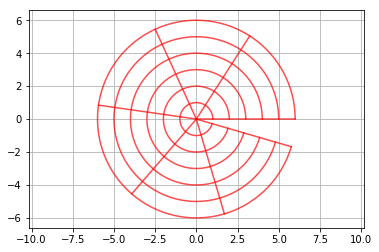

In [93]:
# the set of coordinates in each system and the position vector
x,y,r,t = sy.symbols("x y r \\theta")
Zu = [x,y]
Zp = [r,t]
RZu = sy.Matrix([[x,y]])
RZp = sy.Matrix([[r*sy.cos(t), r*sy.sin(t)]])
plot_2D_transformation_grid(Zp, RZp, axis_equal=True)
show_invariant_gradient(Zu, Zp, RZu, RZp)

### In 3D cartesian and spherical coords

In [88]:

# the set of coordinates in each system and the position vector
x,y,z,r,t,phi = sy.symbols("x y z r \\theta \\phi")
Zu = [x,y,z]
Zp = [r,t,phi]
RZu = sy.Matrix([[x,y,z]])
RZp = sy.Matrix([[r*sy.sin(t)*sy.cos(phi), r*sy.sin(t)*sy.sin(phi), r*sy.cos(t)]])
show_invariant_gradient(Zu, Zp, RZu, RZp)

<IPython.core.display.Latex object>

### an scaling transformation

<IPython.core.display.Latex object>

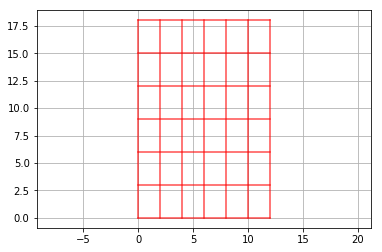

In [95]:
# the set of coordinates in each system and the position vector
v,w = sy.symbols("v w")

Zu = [x,y]
Zp = [v,w]
RZu = sy.Matrix([[x,y]])
RZp = sy.Matrix([[2*v, 3*w]])
plot_2D_transformation_grid(Zp, RZp, axis_equal=True)
show_invariant_gradient(Zu, Zp, RZu, RZp)

### shear transformation (helsinki grid)

<IPython.core.display.Latex object>

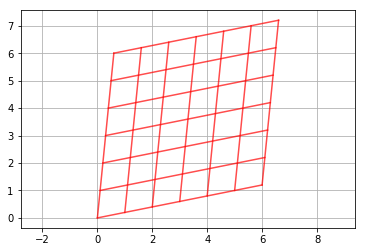

In [96]:
# the set of coordinates in each system and the position vector
x,y,v,w = sy.symbols("x y v w")

Zu = [x,y]
Zp = [v,w]
RZu = sy.Matrix([[x,y]])
RZp = sy.Matrix([[v+.1*w, w+.2*v]])
plot_2D_transformation_grid(Zp, RZp, axis_equal=True)
show_invariant_gradient(Zu, Zp, RZu, RZp)

### rotating transformation at 45º

<IPython.core.display.Latex object>

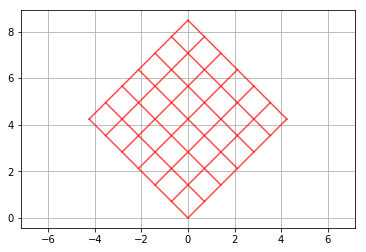

In [97]:
# the set of coordinates in each system and the position vector
x,y,v,w= sy.symbols("x y v w")

Zu = [x,y]
Zp = [v,w]

alpha = sy.pi/4

RZu = sy.Matrix([[x,y]])
RZp = sy.Matrix([[(v*sy.cos(alpha) - w*sy.cos(alpha)), w*sy.cos(alpha)+v*sy.sin(alpha)]])
plot_2D_transformation_grid(Zp, RZp, axis_equal=True)
show_invariant_gradient(Zu, Zp, RZu, RZp)